Visualização de dados do Pix utilizando API do Banco Central

Os valores correspondem à média do total acumulado para cada intervalo de 30 minutos, no período dos últimos 30 dias (24/04 a 23/05).

Variáveis:
* Horário (horas, em intervalos de 30 min)
* Volume médio de transações diárias
* Valor total médio de transações diárias (R$)

In [106]:
#importando as bibliotecas necessárias
import requests
import pandas as pd
import pprint
import plotly.express as px

In [107]:
#link da API
link = "https://olinda.bcb.gov.br/olinda/servico/SPI/versao/v1/odata/PixLiquidadosIntradia?$top=100&$format=json&$select=Horario,QuantidadeMedia,TotalMedio"

In [108]:
#Criando variável de requisição e obtendo o link
requisição = requests.get(link)

In [109]:
#transformando a requisição para o formato json
padrão = requisição.json()

In [110]:
#printando o json
pprint.pprint(padrão)

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/SPI/versao/v1/odata$metadata#PixLiquidadosIntradia(Horario,QuantidadeMedia,TotalMedio)',
 'value': [{'Horario': '00:00',
            'QuantidadeMedia': 1612900,
            'TotalMedio': 238480794.96},
           {'Horario': '00:30',
            'QuantidadeMedia': 1285912,
            'TotalMedio': 128383626.19},
           {'Horario': '01:00',
            'QuantidadeMedia': 1019499,
            'TotalMedio': 423366893.62},
           {'Horario': '01:30',
            'QuantidadeMedia': 790384,
            'TotalMedio': 89501382.01},
           {'Horario': '02:00',
            'QuantidadeMedia': 618385,
            'TotalMedio': 59314001.15},
           {'Horario': '02:30',
            'QuantidadeMedia': 499098,
            'TotalMedio': 48376411.09},
           {'Horario': '03:00',
            'QuantidadeMedia': 433796,
            'TotalMedio': 308910481.17},
           {'Horario': '03:30',
            'QuantidadeMedia'

In [114]:
#transformando o json em um dataframe
df = pd.DataFrame(padrão['value'])

In [115]:
#imprimindo as 10 primeiras linhas do dataframe
df.head(10)

,Horario,QuantidadeMedia,TotalMedio
0,00:00,1612900,2.384808e+08
1,00:30,1285912,1.283836e+08
2,01:00,1019499,4.233669e+08
3,01:30,790384,8.950138e+07
4,02:00,618385,5.931400e+07
5,02:30,499098,4.837641e+07
6,03:00,433796,3.089105e+08
7,03:30,368008,2.206969e+08
8,04:00,351187,2.114066e+08
9,04:30,341872,1.226551e+08


In [116]:
#valor médio por transação

In [117]:
#Criando variáveis com os horários de menor e maior volume de transações
hora_menor_volume = df.loc[df['QuantidadeMedia'].idxmin(), 'Horario']
hora_maior_volume = df.loc[df['QuantidadeMedia'].idxmax(), 'Horario']
#Criando variáveis com o menor e o maior número de transações
menor_numero = df['QuantidadeMedia'].min()
maior_numero = df['QuantidadeMedia'].max()


In [118]:
print(f"Horários, por número de transações acumuladas nos últimos 30 minutos:")
print(f"\tMenor número: {hora_menor_volume} ({menor_numero:,} transações)\n\tMaior número: {hora_maior_volume} ({maior_valor:,} transações)")

Horários, por número de transações acumuladas nos últimos 30 minutos:
	Menor número: 04:30 (341,872 transações)
	Maior número: 18:00 (3,042,824,310.44 transações)


In [119]:
#Criando variáveis com os horários com o menor e o maior valor total médio de transações
hora_menor_valor = df.loc[df['TotalMedio'].idxmin(), 'Horario']
hora_maior_valor = df.loc[df['TotalMedio'].idxmax(), 'Horario']
#criando variáveis com o menor e maior valor (em R$) de transações
menor_valor = df['TotalMedio'].min()
maior_valor = df['TotalMedio'].max()

In [120]:
print(f"Horários, por valor das transações acumulado nos últimos 30 minutos:")
print(f"\tMenor valor: {hora_menor_valor} (R$ {menor_valor:,})\n\tMaior valor: {hora_maior_valor} (R${maior_valor:,})")

Horários, por valor das transações acumulado nos últimos 30 minutos:
	Menor valor: 02:30 (R$ 48,376,411.09)
	Maior valor: 15:30 (R$3,042,824,310.44)


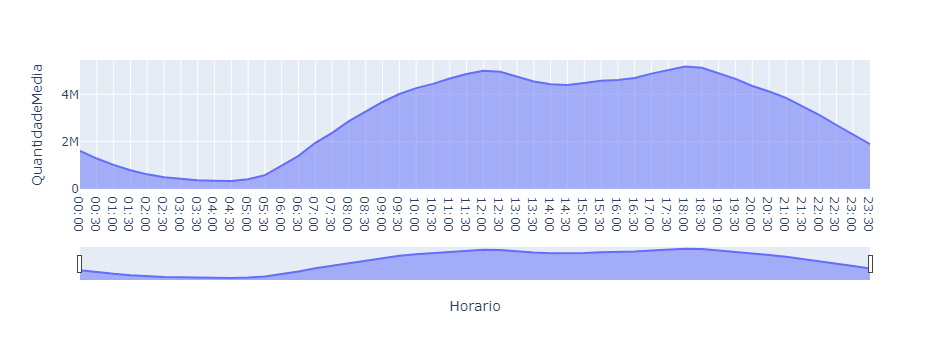

In [121]:
#plotando gráfico de área com a quantidade média de transações por cada 30 minutos
fig1 = px.area(df, x = 'Horario', y = 'QuantidadeMedia')
fig1.update_xaxes(rangeslider_visible=True)

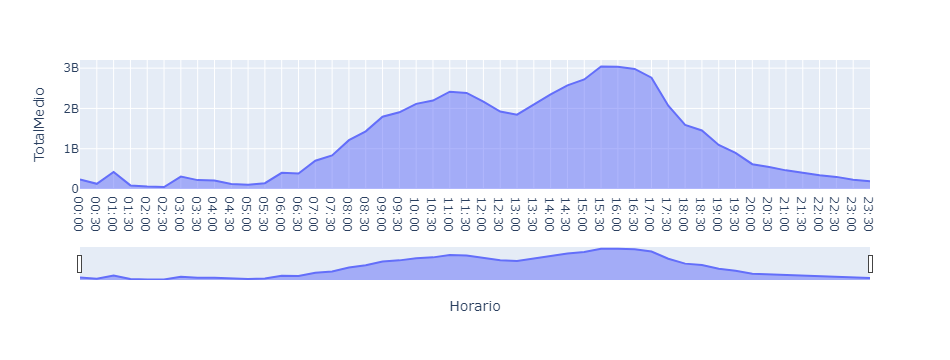

In [122]:
#plotando gráfico de área com o valor total médio de transações por cada 30 minutos
fig2 = px.area(df, x = 'Horario', y = 'TotalMedio')
fig2.update_xaxes(rangeslider_visible=True)